# Chapter 3 - Vectors, Part 2

In [169]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

# Linear Weighted Combination

- means scalar-vector multiplication and addition
- assumed that all vectors have the same dimensionality

In [171]:
l1 = 1
l2 = 2
l3 = -3
v1 = np.array([4,5,1])
v2 = np.array([-4,0,-4])
v3 = np.array([1,3,2])

l1*v1 + l2*v2 + l3*v3

array([ -7,  -4, -13])

# Linear Independence

# The Math of Linear Independence

# Independence and the Zeros Vector

# Subspace and Span

The dimension of the subspace (the space created by combining the vectors) is:
- Equal to the number of vectors if they’re independent.
- Smaller than the number of vectors if some are dependent.

# Basis vectors and points

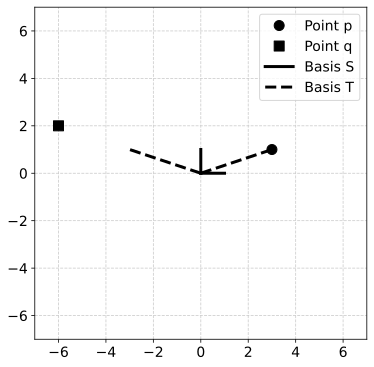

In [173]:
# points (in Cartesian coordinates)
p = (3,1)
q = (-6,2)

plt.figure(figsize=(6,6))

# draw points
plt.plot(p[0],p[1], 'ko', markerfacecolor='k',markersize=10,label='Point p')
plt.plot(q[0],q[1], 'ks', markerfacecolor='k',markersize=10,label='Point q')

# draw basis vectors
plt.plot([0,0],[0,1], 'k', linewidth=3, label='Basis S')
plt.plot([0,1],[0,0], 'k', linewidth=3)

plt.plot([0,3],[0,1], 'k--', linewidth=3, label='Basis T')
plt.plot([0,-3],[0,1], 'k--', linewidth=3)

plt.axis('square')
plt.grid(linestyle='--', color=[.8,.8,.8])
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.savefig('Figure_01_04.png', dpi=300)
plt.show()

# Code Exercise

## Exercise 1

Rewrite the code for linear weighted combination, but put the scalars in a list and the vectors as elements in a list (thus, you will have two lists, one of scalars and one of NumPy arrays). Then use a for loop to implement the linear weighted combination operation. Initialize the output vector using np.zeros(). Confirm that you get the same result as in the previous code.

In [176]:
scalars = [l1,l2,l3]
vectors = [v1,v2,v3]

lin_wc = np.zeros_like(vectors[0])

# use zip for 
for s, v in zip(scalars, vectors):
    lin_wc += s*v

print(lin_wc)
# print(sum(lin_wc))
# print(np.zeros(sum(lin_wc)))

[ -7  -4 -13]


# Exercise 2

Although the method of looping through lists in the previous exercise is not as efficient as matrix-vector multiplication, it is more scalable than without a for loop. You can explore this by adding additional scalars and vectors as elements in the lists. What happens if the new added vector is in ℝ4 instead of ℝ3? And what happens if you have more scalars than vectors?

In [178]:
scalars = [l1,l2,l3,5]
vectors = [v1,v2,v3]

linCombo = np.zeros(len(v1))

for i in range(len(scalars)):
    linCombo += scalars[i]*vectors[i]

IndexError: list index out of range

# Exercise 3

In this exercise, you will draw random points in subspaces. This will help reinforce the idea that subspaces comprise any linear weighted combination of the spanning vectors. Define a vector set containing one vector [1, 3]. Then create 100 numbers drawn randomly from a uniform distribution between −4 and +4. Those are your random scalars. Multiply the random scalars by the basis vector to create 100 random points in the subspace. Plot those points.

Next, repeat the procedure but using two vectors in ℝ3: [3, 5, 1] and [0, 2, 2]. Note that you need 100 × 2 random scalars for 100 points and two vectors. The resulting random dots will be on a plane. Figure 3-7 shows what the results will look like (it’s not clear from the figure that the points lie on a plane, but you’ll see this when you drag the plot around on your screen).

I recommend using the plotly library to draw the dots, so you can click-drag the 3D axis around. Here’s a hint for getting it to work:

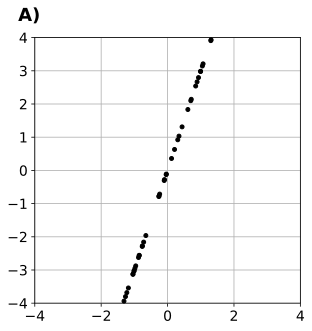

In [184]:
vect_set = [1,3]
vect_array = np.array(vect_set, dtype=np.float64)
scalar = np.random.uniform(-4,4,100)

for s in scalar:
    scalar = s*vect_array
    scalar_lst = [scalar]
    # print(scalar_lst)
    for sc in scalar_lst:
        plt.plot(sc[0],sc[1],'ko',markerfacecolor='k',markersize=4)

plt.axis('square')
plt.grid()
plt.axis([-4,4,-4,4])
plt.text(-4.5,4.5,'A)',fontweight='bold',fontsize=18)
plt.savefig('Figure_03_07a.png',dpi=300)
plt.show()

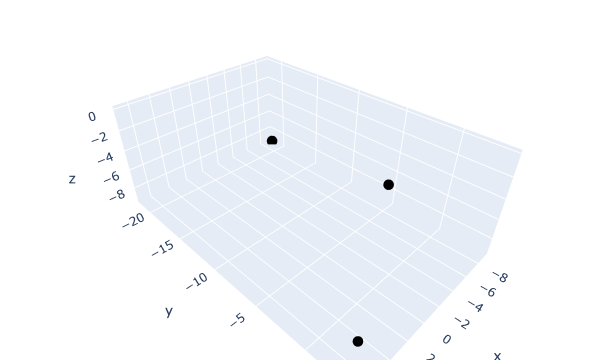

<Figure size 640x480 with 0 Axes>

In [186]:
import plotly.graph_objects as go

v1 = np.array([3,5,1])
v2 = np.array([0,2,2])

# v1 = np.array([3.0,5.0,1.0])
# v2 = np.array([1.5,2.5,.5])


# vect_array = np.array(two_vects, dtype=np.float64)
xlim = [-4,4]
scalars = np.random.uniform(low=xlim[0],high=xlim[1],size=(100,2))

# create random points
points = np.zeros((100,3))
for i in range(len(scalar)):

    # define this point as a random weighted combination of the two vectors
    points[i,:] = v1*scalars[i,0] + v2*scalars[i,1]

# draw the dots in the plane
fig = go.Figure( data=[go.Scatter3d(
    x=points[:,0], y=points[:,1], z=points[:,2],
    mode='markers', marker=dict(size=6, color='black')
)])

fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
plt.savefig('Figure_03_07b.png',dpi=300)
fig.show()